# US Home prices

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the files supply and demand using pandas 

supply = pd.read_csv('supply.csv')
demand = pd.read_csv('demand.csv')

In [3]:
#create a dataframe by merging supply and demand

df = supply.merge(demand,on='DATE')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            81 non-null     object 
 1   CSUSHPISA_x     81 non-null     object 
 2   MSACSR          81 non-null     object 
 3   PERMIT          81 non-null     object 
 4   TLRESCONS       81 non-null     object 
 5   EVACANTUSQ176N  81 non-null     object 
 6   CSUSHPISA_y     80 non-null     float64
 7   MORTGAGE30US    81 non-null     float64
 8   UMCSENT         81 non-null     float64
 9   INTDSRUSM193N   74 non-null     float64
 10  MSPUS           81 non-null     int64  
 11  GDP             81 non-null     float64
dtypes: float64(5), int64(1), object(6)
memory usage: 8.2+ KB


In [4]:
#remane the column

df.rename(columns={'CSUSHPISA_x':'Home_price_index','MSACSR':'Monthly_supply','PERMIT':'Permit'\
                   ,'TLRESCONS':'Total_consumption spending'
                  ,'EVACANTUSQ176N':'Housing_inventory','MORTGAGE30US':'30y_mortgage','UMCSENT':'Consumer_sentiment'\
                   ,'INTDSRUSM193N':'Interest_rates','MSPUS':'Median_sales_price','DATE':'Date'},inplace = True)

In [5]:
df.drop(columns = ['CSUSHPISA_y'],inplace=True)

In [6]:
df.head(5)

,Date,Home_price_index,Monthly_supply,Permit,Total_consumption spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
0,01-01-2003,129.321,4.2,1806.333333,421328.6667,14908,5.840769,79.966667,2.250000,186000,11174.129
1,01-04-2003,131.756,3.833333333,1837.666667,429308.6667,15244,5.506923,89.266667,2.166667,191800,11312.766
2,01-07-2003,135.013,3.633333333,1937.333333,458890,15614,6.033846,89.300000,2.000000,191900,11566.669
3,01-10-2003,138.8356667,3.966666667,1972.333333,491437.3333,15654,5.919286,91.966667,2.000000,198800,11772.234
4,01-01-2004,143.2986667,3.7,1994.666667,506856.3333,15895,5.597500,98.000000,2.000000,212700,11923.447


In [7]:
#removing the missig values

df.dropna(inplace=True) # inplace=True argument is used for data frame to make changes permanent
df['Date'] = pd.to_datetime(df['Date']) #set the date formate
df.head(5)

,Date,Home_price_index,Monthly_supply,Permit,Total_consumption spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
0,2003-01-01,129.321,4.2,1806.333333,421328.6667,14908,5.840769,79.966667,2.250000,186000,11174.129
1,2003-01-04,131.756,3.833333333,1837.666667,429308.6667,15244,5.506923,89.266667,2.166667,191800,11312.766
2,2003-01-07,135.013,3.633333333,1937.333333,458890,15614,6.033846,89.300000,2.000000,191900,11566.669
3,2003-01-10,138.8356667,3.966666667,1972.333333,491437.3333,15654,5.919286,91.966667,2.000000,198800,11772.234
4,2004-01-01,143.2986667,3.7,1994.666667,506856.3333,15895,5.597500,98.000000,2.000000,212700,11923.447


In [8]:
#converting into mumerical standard data where float data type and upto decimal 1 using .round(1)

df['Home_price_index'] = df['Home_price_index'].astype(float).round(1)
df['Monthly_supply']=df['Monthly_supply'].astype(float).round(1)
df['Permit']=df['Permit'].astype(float).round(1)
df['Total_consumption spending']=df['Total_consumption spending'].astype(float).round(1)
df['Housing_inventory']=df['Housing_inventory'].astype(float).round(1)
df['30y_mortgage']=df['30y_mortgage'].astype(float).round(1)
df['Consumer_sentiment']=df['Consumer_sentiment'].astype(float).round(1)
df['Interest_rates']=df['Interest_rates'].astype(float).round(1)
df['Median_sales_price']=df['Median_sales_price'].astype(float).round(1)
df['GDP']=df['GDP'].astype(float).round(1)

df.head(5)

,Date,Home_price_index,Monthly_supply,Permit,Total_consumption spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
0,2003-01-01,129.3,4.2,1806.3,421328.7,14908.0,5.8,80.0,2.2,186000.0,11174.1
1,2003-01-04,131.8,3.8,1837.7,429308.7,15244.0,5.5,89.3,2.2,191800.0,11312.8
2,2003-01-07,135.0,3.6,1937.3,458890.0,15614.0,6.0,89.3,2.0,191900.0,11566.7
3,2003-01-10,138.8,4.0,1972.3,491437.3,15654.0,5.9,92.0,2.0,198800.0,11772.2
4,2004-01-01,143.3,3.7,1994.7,506856.3,15895.0,5.6,98.0,2.0,212700.0,11923.4


[Text(0.5, 1.0, 'Monthly supply over the years')]

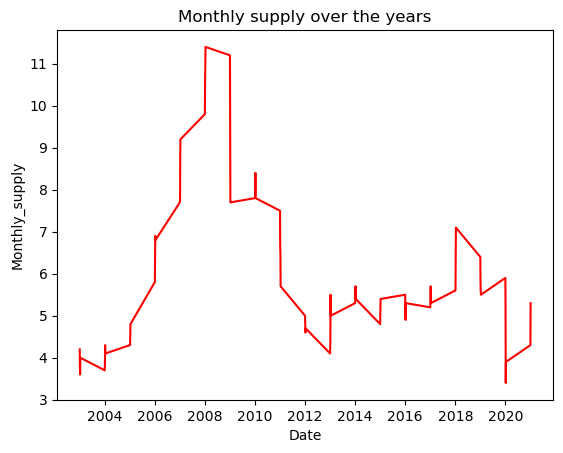

In [9]:
sns.lineplot(data=df,x='Date',y='Monthly_supply',color='red').set(title='Monthly supply over the years')

# this plot shows the monthly supply over the last 20 years

[Text(0.5, 1.0, 'Home prices index over the years')]

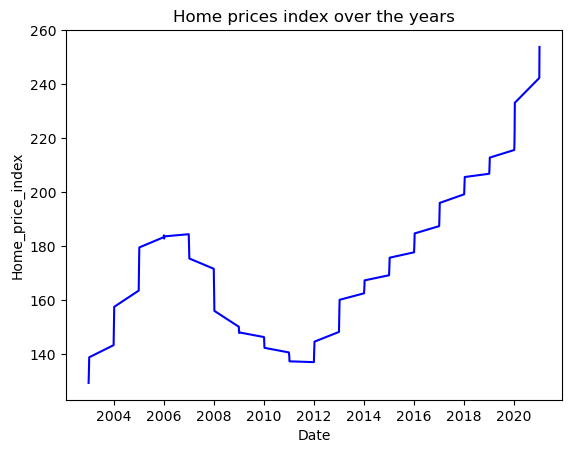

In [10]:
sns.lineplot(data=df,x='Date',y='Home_price_index',color='blue').set(title='Home prices index over the years')

# this plot shows the Home prices index over the last 20 years

[Text(0.5, 1.0, 'Permit over the years')]

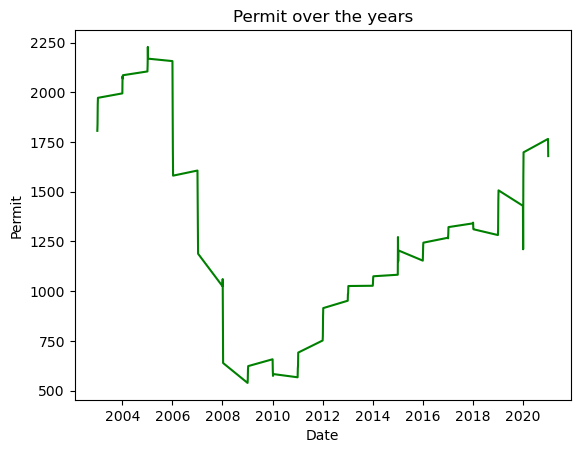

In [11]:
sns.lineplot(data=df,x='Date',y='Permit',color='green').set(title='Permit over the years')

# this plot shows the Permit over the last 20 years

[Text(0.5, 1.0, 'Total_consumption spending over the years')]

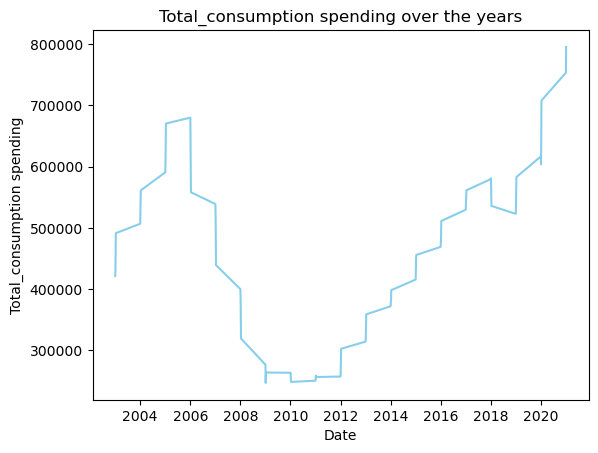

In [12]:
sns.lineplot(data=df,x='Date',y='Total_consumption spending',color='skyblue').set(title='Total_consumption spending over the years')

# this plot shows the Total_consumption spending over the last 20 years

[Text(0.5, 1.0, 'GDP over the last 20 years')]

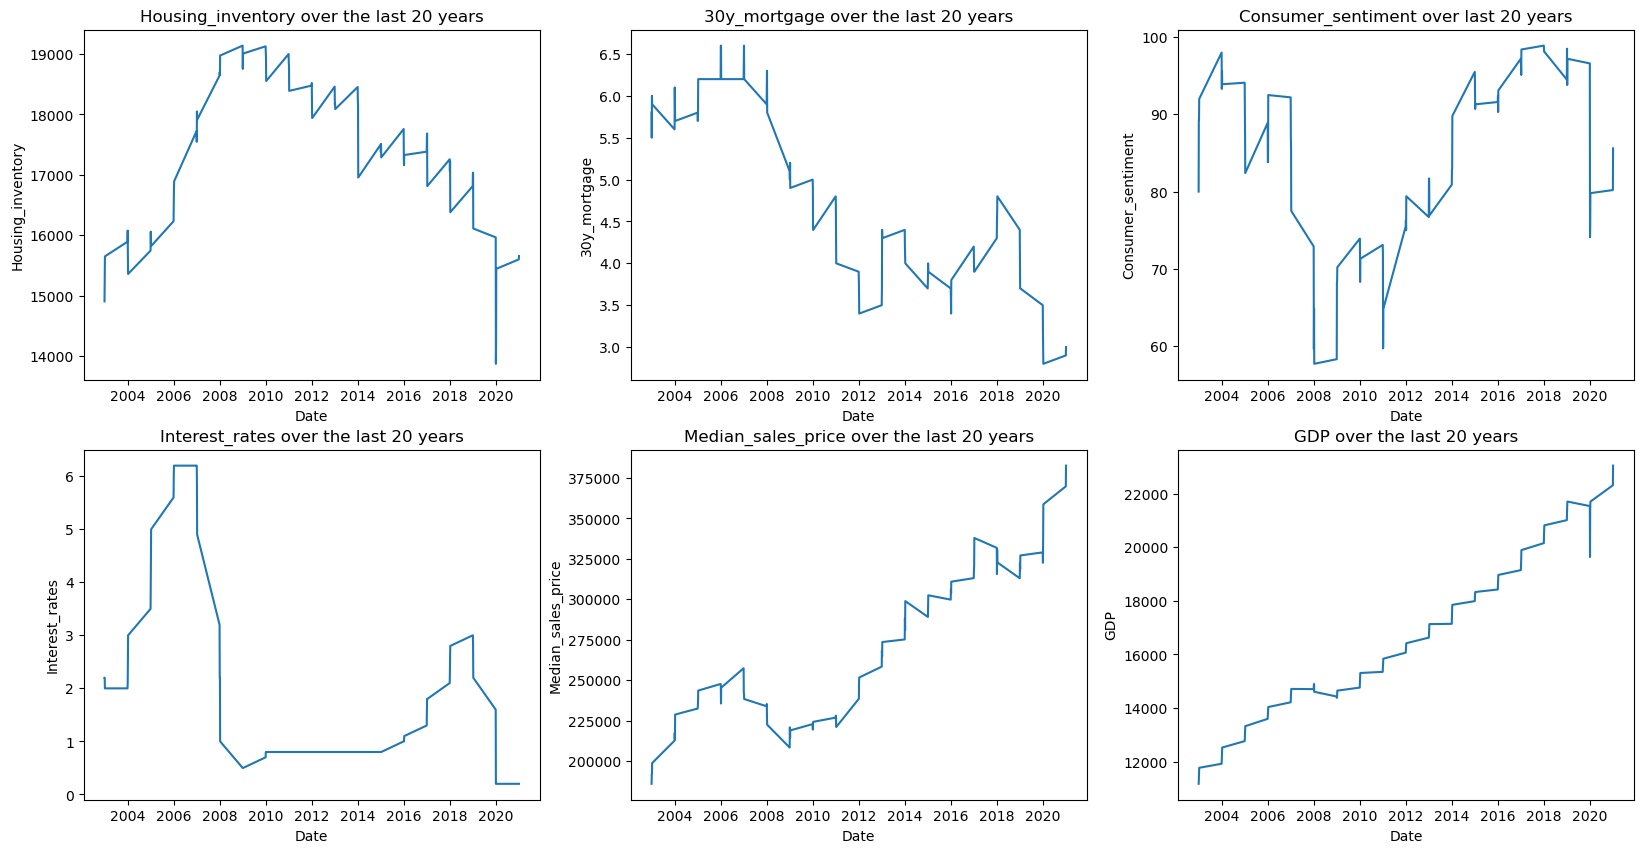

In [13]:
#ploting the data in single fig using pyplot
figure,ax = plt.subplots(nrows=2,ncols=3,figsize=(20,10))

sns.lineplot(ax = ax[0,0],data =df,x='Date',y='Housing_inventory').set(title='Housing_inventory over the last 20 years')
sns.lineplot(ax = ax[0,1],data=df,x='Date',y='30y_mortgage').set(title='30y_mortgage over the last 20 years')
sns.lineplot(ax = ax[0,2],data=df,x='Date',y='Consumer_sentiment').set(title='Consumer_sentiment over last 20 years')

sns.lineplot(ax = ax[1,0],data=df,x='Date',y='Interest_rates').set(title='Interest_rates over the last 20 years')
sns.lineplot(ax = ax[1,1],data=df,x='Date',y='Median_sales_price').set(title='Median_sales_price over the last 20 years')
sns.lineplot(ax = ax[1,2],data=df,x='Date',y='GDP').set(title='GDP over the last 20 years')

In [14]:
# relation betweeen the factors impacted the home prices for last 20 years

correlation = df.drop('Date',axis=1)
correlation.head(5)

,Home_price_index,Monthly_supply,Permit,Total_consumption spending,Housing_inventory,30y_mortgage,Consumer_sentiment,Interest_rates,Median_sales_price,GDP
0,129.3,4.2,1806.3,421328.7,14908.0,5.8,80.0,2.2,186000.0,11174.1
1,131.8,3.8,1837.7,429308.7,15244.0,5.5,89.3,2.2,191800.0,11312.8
2,135.0,3.6,1937.3,458890.0,15614.0,6.0,89.3,2.0,191900.0,11566.7
3,138.8,4.0,1972.3,491437.3,15654.0,5.9,92.0,2.0,198800.0,11772.2
4,143.3,3.7,1994.7,506856.3,15895.0,5.6,98.0,2.0,212700.0,11923.4


[Text(0.5, 1.0, 'Correlation between factors impacted the home price')]

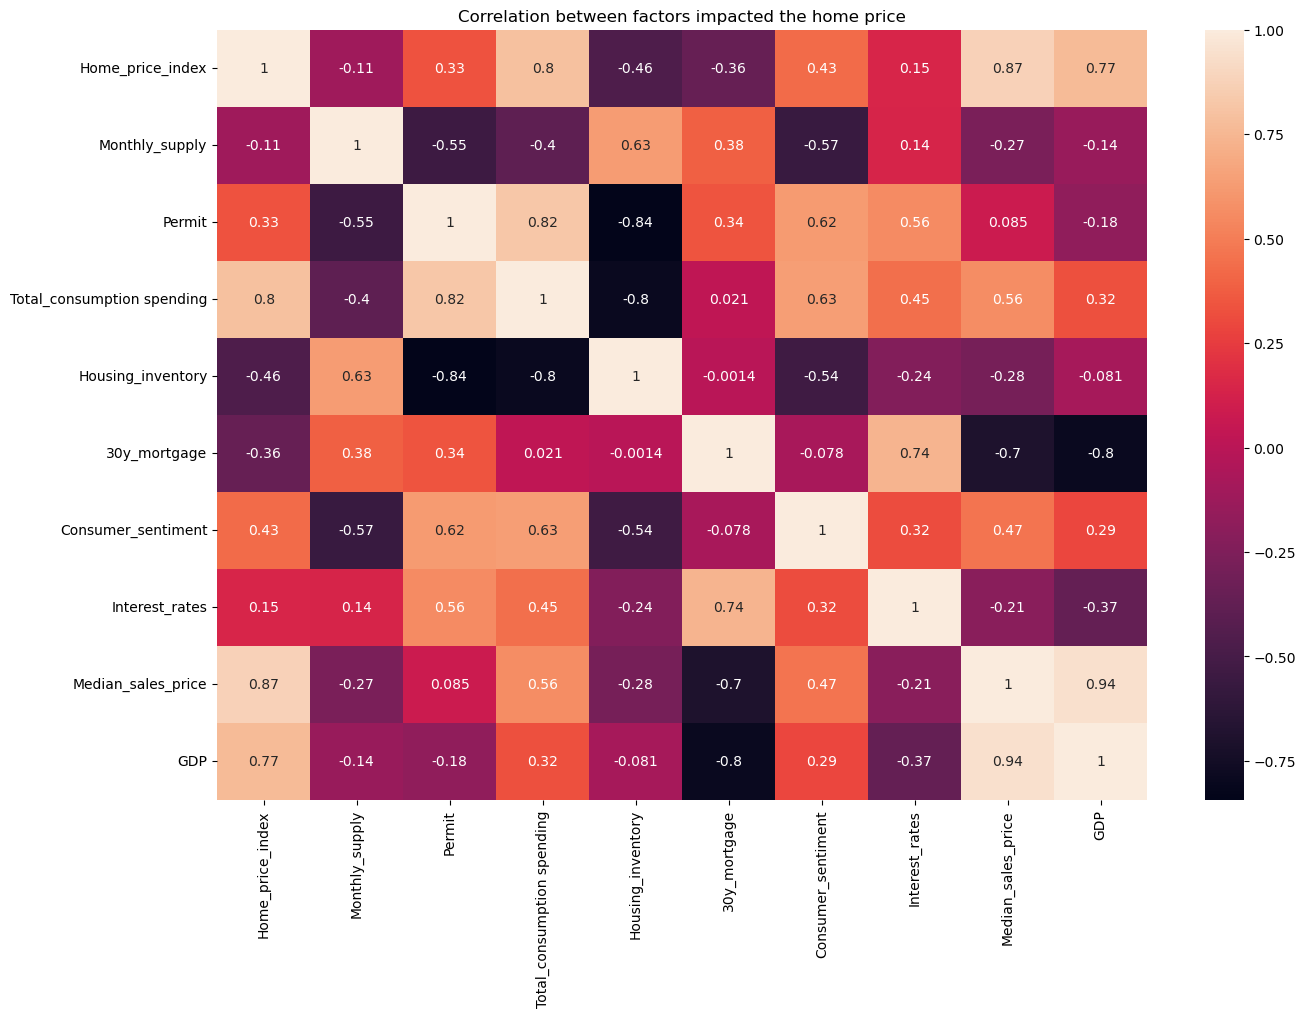

In [15]:
corr = correlation.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data=corr,annot=True).set(title='Correlation between factors impacted the home price')

[Text(0.5, 1.0, 'Relationship between consumer sentiment and home price index')]

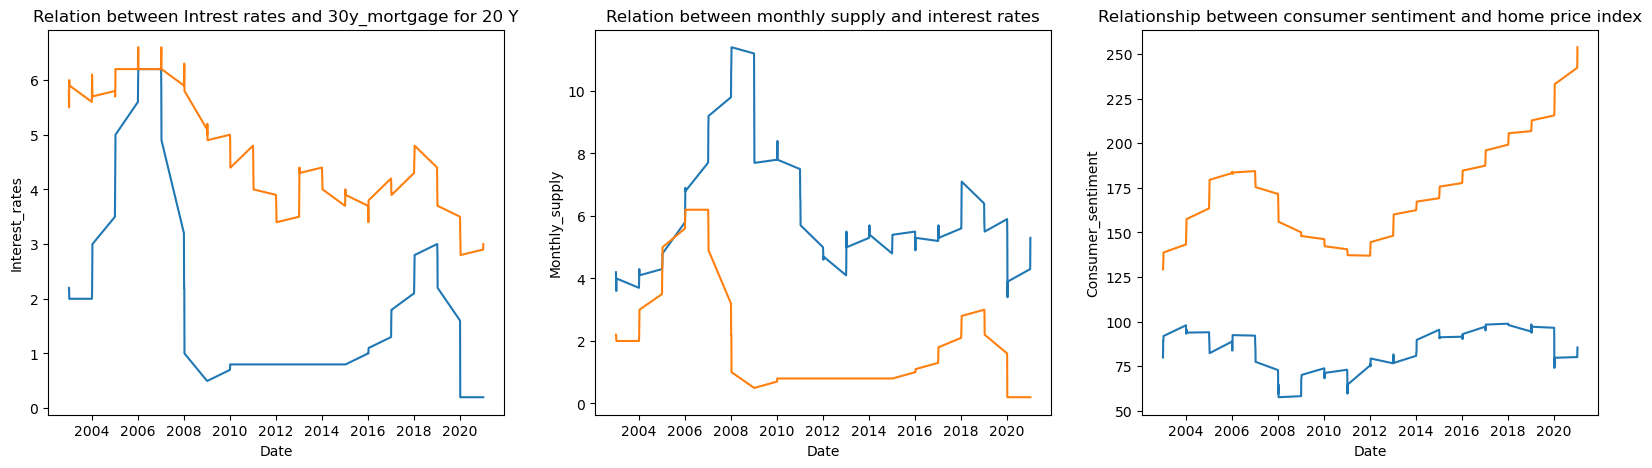

In [16]:
figure,ax = plt.subplots(nrows=1,ncols=3,figsize=(20,5))
sns.lineplot(ax = ax[0],data=df,x='Date',y='Interest_rates')
sns.lineplot(ax = ax[0],data=df,x='Date',y='30y_mortgage').set(title='Relation between Intrest rates and 30y_mortgage for 20 Y')

sns.lineplot(ax=ax[1],x = 'Date',y='Monthly_supply',data =df)
sns.lineplot(ax=ax[1],x = 'Date',y='Interest_rates',data =df).set(title='Relation between monthly supply and interest rates')

sns.lineplot(ax=ax[2],x = 'Date',y='Consumer_sentiment',data =df)
sns.lineplot(ax=ax[2],x = 'Date',y='Home_price_index',data =df).set(title='Relationship between consumer sentiment and home price index')


# ML model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor


In [18]:
#spliting data into dependent and independent 

df = df.drop('Date',axis=1)
X = df.drop('Home_price_index',axis=1)
y = df['Home_price_index']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [20]:
#Random Forest

regressor = RandomForestRegressor(n_estimators=100,max_depth=5)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

r2_score(y_test,y_pred)

0.9569793351507824

[0.9666027291408235,
 0.9746381294011234,
 0.9505957516329792,
 0.9409845976098918,
 0.9194929465979306,
 0.9035139143410006,
 0.8788770336578968,
 0.8545999764834524,
 0.8235255158091749,
 0.7999734824883431,
 0.7796412595463614,
 0.7600523868409171,
 0.7533012294443815,
 0.73557375020154,
 0.7273387654374689,
 0.7023947717777805,
 0.6971397859936301,
 0.6746357162106247,
 0.6522028973258133,
 0.624180252748463,
 0.5984581178308079,
 0.5770460931502255,
 0.5670853375309246,
 0.5568049721319439]

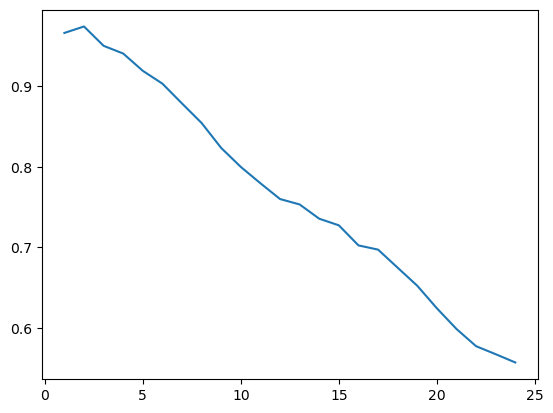

In [21]:
k_range = range(1, 25)
knn_score = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    knn_pred = knn.predict(X_test_scaled)
    knn_score.append(r2_score(y_test, knn_pred))

plt.plot(k_range,knn_score);
knn_score

In [22]:
#Ridge
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train_scaled,y_train)
y_pred = ridge_reg.predict(X_test_scaled)

ridge_reg.score(X_test_scaled,y_test)

0.9344563047008475

In [23]:
#Gradient Booster
gb_reg = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
gb_reg.fit(X_train_scaled, y_train)
gb_pred = gb_reg.predict(X_test_scaled)

r2_score(y_test, gb_pred)

0.938287055655529

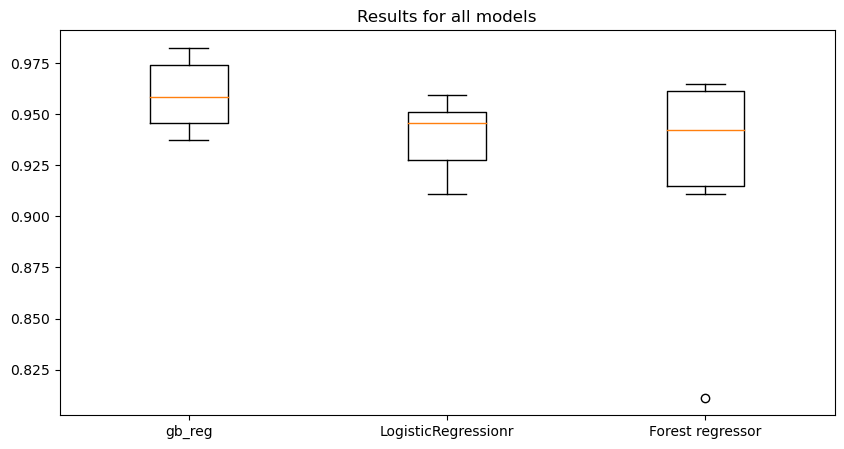

In [24]:
plt.figure(figsize=(10,5))
plt.title('Results for all models')
models = {"gb_reg":  GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1), "LogisticRegressionr": ridge_reg,"Forest regressor": RandomForestRegressor(n_estimators=100, max_depth=5)}

outcome = []

for model in models.values():
    kf = KFold(n_splits=6,random_state = 42,shuffle = True)
    cv_result = cross_val_score(model,X_train_scaled,y_train,cv=kf)
    outcome.append(cv_result)
plt.boxplot(outcome,labels = models.keys())
plt.show()

# Summary
Monthly supply: The monthly supply of houses is the number of homes that are available for sale divided by the number of homes that are sold each month. A low monthly supply indicates that there are more buyers than sellers, which can lead to higher prices.
Consumer sentiment: Consumer sentiment is a measure of how confident consumers are about the economy. A high level of consumer sentiment indicates that consumers are more likely to buy homes, which can lead to higher demand and higher prices.
Housing inventory: Housing inventory is the number of homes that are available for sale. A low housing inventory indicates that there are fewer homes available for sale, which can lead to higher prices.
Median sales price: The median sales price is the price at which half of the homes sold for more and half sold for less. A rising median sales price indicates that home prices are increasing.
GDP: GDP is the total value of goods and services produced in a country. A rising GDP indicates that the economy is growing, which can lead to higher demand for housing and higher prices.
As you can see, the supply and demand of houses are closely correlated. When there is a low supply of houses and a high demand, prices tend to rise. When there is a high supply of houses and a low demand, prices tend to fall.